In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("./surveyDataSience.csv", header=None)
df.columns = df.iloc[1]
df = df.iloc[2:].reset_index(drop=True)

C:\Users\Alex\AppData\Local\Temp\ipykernel_8352\3603546649.py:1: DtypeWarning: Columns (0,18,32,49,56,69,88,100,107,113,139,184,195,201,202,253,266,278,283,285,286,287,288,289,290,291,292,301,322,339,347,355,367) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./surveyDataSience.csv", header=None)


In [22]:
number_of_respondents = len(df) - 1
number_of_inputs = len(df.columns.tolist())

print('Number of respondents: ', number_of_respondents)
print('Number of inputs: ', number_of_inputs)
# print('Inputs: ', df.columns.tolist())


Number of respondents:  25972
Number of inputs:  369


In [6]:
bachelor_years = 3
master_years = 3 + 2
phd_years = 3 + 2 + 3

In [7]:
def calculate_average_duration(education_frequency):
    total_years = education_frequency.get('Master’s degree', 0) * master_years
    total_years += (education_frequency.get('Bachelor’s degree', 0) + 
                     education_frequency.get('Some college/university study without earning a bachelor’s degree', 0)) * bachelor_years
    total_years += (education_frequency.get('Doctoral degree', 0) + 
                     education_frequency.get('Professional doctorate', 0)) * phd_years

    return total_years / (sum(education_frequency.values()) - education_frequency.get('I prefer not to answer', 0))

education_frequency_total = df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict()

romania_df = df[df['In which country do you currently reside?'] == 'Romania']
education_frequency_romania = romania_df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict()

romania_women_df = romania_df[romania_df['What is your gender? - Selected Choice'] == 'Woman']
education_frequency_romania_women = romania_women_df['What is the highest level of formal education that you have attained or plan to attain within the next 2 years?'].value_counts().to_dict()

print('Average duration of studies: ', '{:.2f}'.format(calculate_average_duration(education_frequency_total)), ' years')
print('Average duration of studies for people from Romania: ', '{:.2f}'.format(calculate_average_duration(education_frequency_romania)), ' years')
print('Average duration of studies for women from Romania', '{:.2f}'.format(calculate_average_duration(education_frequency_romania_women)), ' years')


Average duration of studies:  4.37  years
Average duration of studies for people from Romania:  4.88  years
Average duration of studies for women from Romania 5.44  years


In [17]:
print('Number of romanian women with complete data: ', romania_women_df.dropna().shape[0])


Number of romanian women with complete data:  0


In [21]:
romania_women_python_df = romania_women_df[romania_women_df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'] == 'Python']
romania_women_cpp_df = romania_women_df[romania_women_df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - C++'] == 'C++']

print('Number of romanian women who use Python: ', len(romania_women_python_df))
print('Number of romanian women who use C++: ', len(romania_women_cpp_df))

print('Most common age group for women who use Python', max(romania_women_python_df['What is your age (# years)?'].dropna().value_counts().to_dict()))
print('Most common age group for women who use C++', max(romania_women_cpp_df['What is your age (# years)?'].dropna().value_counts().to_dict()))

Number of romanian women who use Python:  12
Number of romanian women who use C++:  4
Most common age group for women who use Python 40-44
Most common age group for women who use C++ 35-39


In [10]:
class Question:
    def __init__(self, question):
        self.question = question
        self.answers = []
        
    def get_question(self):
        return self.question
    
    def set_question(self, q):
        self.question = q
        self.answers = []
    
    def add_answer(self, answer):
        self.answers += [answer]
        
    def get_answers(self):
        return self.answers
    
def parse_to_numeric(value):
    try:
        return int(value)
    except ValueError:
        try:
            return float(value)
        except ValueError:
            return None
    
questions = []
last_question = ""
question_obj = Question("")

for column in df.columns:
    split = column.split('-')
    if last_question == split[0] and len(split) > 2:
        question_obj.add_answer(split[2])
    else:
        if len(split) < 3:
            question_obj = Question(column)
        else:
            question_obj = Question(split[0])
        last_question = split[0]
        questions += [question_obj]
        
        
count = 1
for q in questions:
    print(f'{count}) {q.get_question()}')
    if q.get_answers() != []:
        print('Domain: ', ', '.join(q.get_answers()))
    else:
        data_dict = df[q.get_question()].dropna().value_counts().to_dict()
        try:
            numeric_keys = []
            non_numeric_keys = []
            
            for k in data_dict.keys():
                parsed = parse_to_numeric(k)
                if parsed is not None:
                    numeric_keys += [parsed]
                    continue
                non_numeric_keys += [k]
            
            if numeric_keys:
                print(f'Domain: {min(numeric_keys)} - {max(numeric_keys)}')
            elif non_numeric_keys:
                print(f'Domain: {", ".join(k for k in data_dict.keys())}')
            else:
                print("Domain: No valid data")
        except Exception as e:
            print(f"Error determining domain: {e}")
    print()
    count += 1

1) Duration (in seconds)
Domain: 120 - 2488653

2) What is your age (# years)?
Domain: 25-29, 18-21, 22-24, 30-34, 35-39, 40-44, 45-49, 50-54, 55-59, 60-69, 70+

3) What is your gender? - Selected Choice
Domain: Man, Woman, Prefer not to say, Nonbinary, Prefer to self-describe

4) In which country do you currently reside?
Domain: India, United States of America, Other, Japan, China, Brazil, Russia, Nigeria, United Kingdom of Great Britain and Northern Ireland, Pakistan, Egypt, Germany, Spain, Indonesia, Turkey, France, South Korea, Taiwan, Canada, Bangladesh, Italy, Mexico, Viet Nam, Australia, Kenya, Colombia, Poland, Iran, Islamic Republic of..., Ukraine, Argentina, Singapore, Malaysia, Netherlands, South Africa, Morocco, Israel, Thailand, Portugal, Peru, United Arab Emirates, Tunisia, Philippines, Sri Lanka, Greece, Chile, Ghana, Saudi Arabia, Ireland, Sweden, Hong Kong (S.A.R.), Nepal, Switzerland, I do not wish to disclose my location, Belgium, Czech Republic, Romania, Belarus, Au

In [11]:
programming_experience = df['For how many years have you been writing code and/or programming?'].dropna().value_counts().to_dict()

years = {
    '1-3 years': 2,
    '< 1 years': 0.5,
    '3-5 years': 4,
    '5-10 years': 7.5,
    '10-20 years': 15,
    '20+ years': 20,
}

programming_experience_values = []
for key, value in programming_experience.items():
    if key != 'I have never written code':  
        programming_experience_values.extend([years[key]] * value)
        
minn = np.min(programming_experience_values)
maxx = np.max(programming_experience_values)
mean = np.mean(programming_experience_values)
std = np.std(programming_experience_values)
median = np.median(programming_experience_values)

print(f'Minimum: {minn}\nMaximum: {maxx}\nMean: {mean}\nStandard deviation: {std}\nMedian: {median}')


Minimum: 0.5
Maximum: 20.0
Mean: 5.126699009662804
Standard deviation: 5.8312669220006965
Median: 2.0


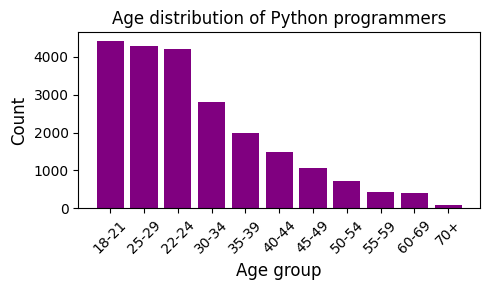

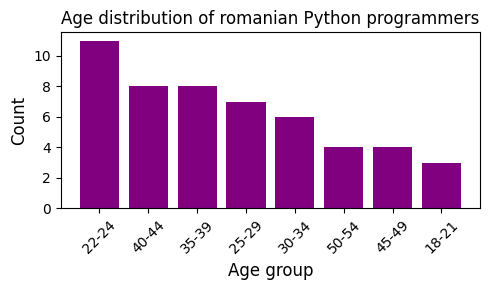

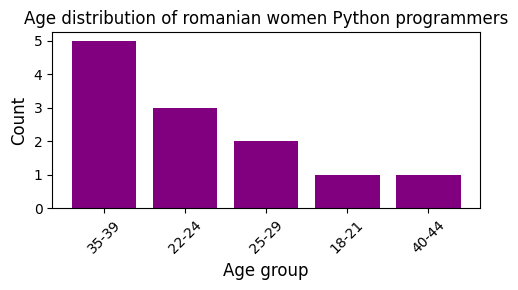

In [12]:
def generate_bar_chart(dict, title, xlabel, ylabel):
    plt.figure(figsize=(5, 3))
    plt.bar(dict.keys(), dict.values(), color='purple')
    
    plt.title(title)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    
python_programming_df = df[df['What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python'] == 'Python']
python_programming_romania_df = python_programming_df[python_programming_df['In which country do you currently reside?'] == 'Romania']
python_programming_romania_women_df = python_programming_romania_df[python_programming_romania_df['What is your gender? - Selected Choice'] == 'Woman']

generate_bar_chart(python_programming_df['What is your age (# years)?'].dropna().value_counts().to_dict(), "Age distribution of Python programmers", "Age group", "Count")
generate_bar_chart(python_programming_romania_df['What is your age (# years)?'].dropna().value_counts().to_dict(), "Age distribution of romanian Python programmers", "Age group", "Count")
generate_bar_chart(python_programming_romania_women_df['What is your age (# years)?'].dropna().value_counts().to_dict(), "Age distribution of romanian women Python programmers", "Age group", "Count")


In [ ]:
# Nu consider outlieri pentru vechimea in programare deoarece raspunsurile nu sunt de forma unui interval liber, ci mai degraba categorice.

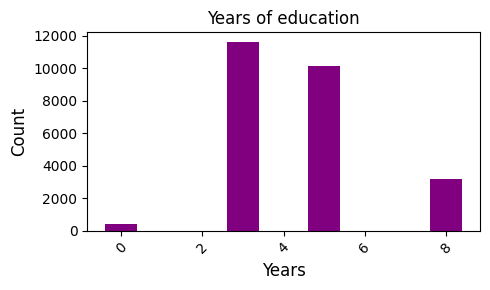

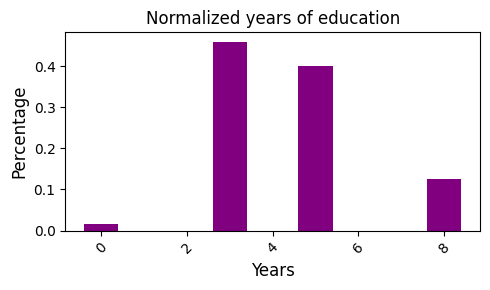

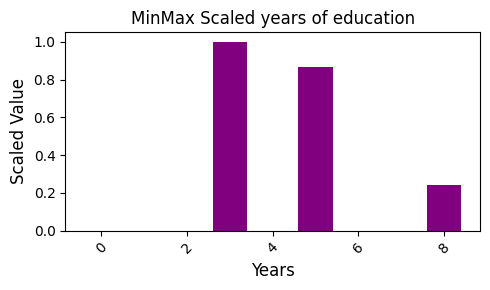

In [13]:
years_of_education_count = {
    master_years: education_frequency_total.get('Master’s degree', 0),
    bachelor_years: (education_frequency_total.get('Bachelor’s degree', 0) + 
                     education_frequency_total.get('Some college/university study without earning a bachelor’s degree', 0)),
    phd_years: (education_frequency_total.get('Doctoral degree', 0) + 
                     education_frequency_total.get('Professional doctorate', 0)),
    0: education_frequency_total.get('No formal education past high school', 0)
}

normalized_years_of_education_count = {
    key: value / sum(years_of_education_count.values()) for key, value in years_of_education_count.items()
}

minn = min(years_of_education_count.values())
maxx = max(years_of_education_count.values())

minmax_scaled_years_of_education_count = {
    key: (value - minn) / (maxx - minn) for key, value in years_of_education_count.items()
}

generate_bar_chart(years_of_education_count, "Years of education", "Years", "Count")
generate_bar_chart(normalized_years_of_education_count, "Normalized years of education", "Years", "Percentage")
generate_bar_chart(minmax_scaled_years_of_education_count, "MinMax Scaled years of education", "Years", "Scaled Value")



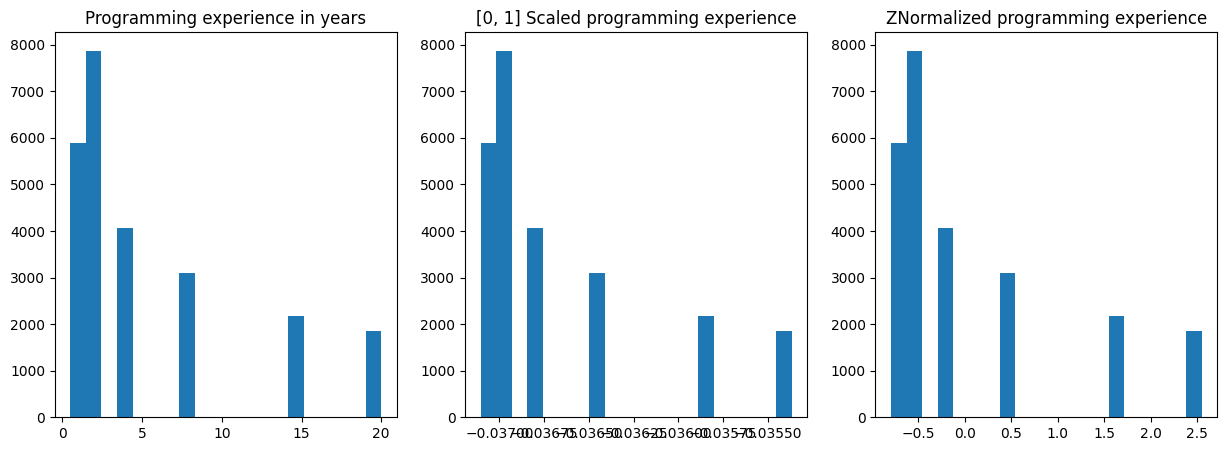

In [14]:
programming_experience_values_scaled = [(p - minn) / (maxx - minn) for p in programming_experience_values]
programming_experience_values_znorm = [(p - mean) / std for p in programming_experience_values]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.hist(programming_experience_values, 20)
ax1.set_title('Programming experience in years')
ax2.hist(programming_experience_values_scaled, 20)
ax2.set_title('[0, 1] Scaled programming experience')
ax3.hist(programming_experience_values_znorm, 20)
ax3.set_title('ZNormalized programming experience')
plt.show()


